In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

(<Figure size 432x288 with 1 Axes>,
 (0.0, 1.0, 0.0, 1.0),
 Text(0.5, 1.0, 'barrel HSV'),
 <matplotlib.image.AxesImage at 0x1de48c41848>)

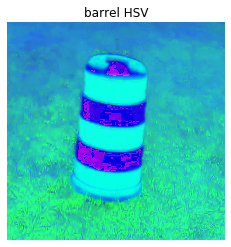

In [2]:
roi = cv2.imread('media/barrel3.jpg')  # Find other barrel images in the media too!
roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
plt.figure(),plt.axis("off"),plt.title("barrel HSV"),plt.imshow(roi_hsv)

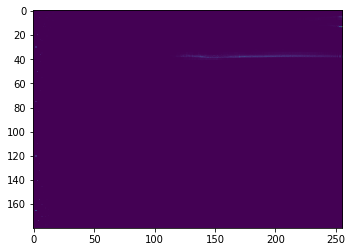

In [3]:
roi_hist = cv2.calcHist([roi_hsv],[0, 1], None, [180, 256], [0, 180, 0, 256])
plt.imshow(roi_hist)
plt.show()

In [4]:
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

array([[129.91461,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       ...,
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ]], dtype=float32)

In [5]:
cap = cv2.VideoCapture('media/igvc2015.mp4')

In [6]:
while(cap.isOpened()):     
        
        ret, target = cap.read()
        
        if ret:           
            target_hsv = cv2.cvtColor(target, cv2.COLOR_BGR2HSV)
            res = cv2.calcBackProject([target_hsv], [0,1], roi_hist, [0,180,0,256], 1)  #the barrel
            
            disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
            cv2.filter2D(res, -1, disc, res) #res is the matrix obtained after back projection
            
            ret, thresh = cv2.threshold(res, 80, 255, 0)
            final = cv2.merge((thresh,thresh,thresh))
            
            result = cv2.bitwise_or(target, final)
            
            cv2.imshow('Result', result)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
      
        else:
            break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()